<a href="https://colab.research.google.com/github/gbomiye/3mtt-data-science/blob/master/DSN_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [105]:
img = cv2.imread('/Desert.jpg')
img.shape

(768, 1024, 3)

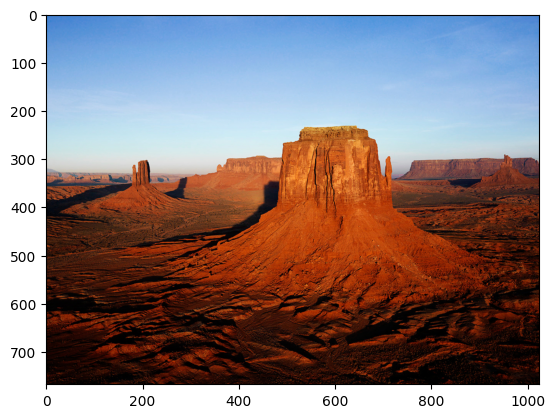

In [106]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

(25, 25, 3)

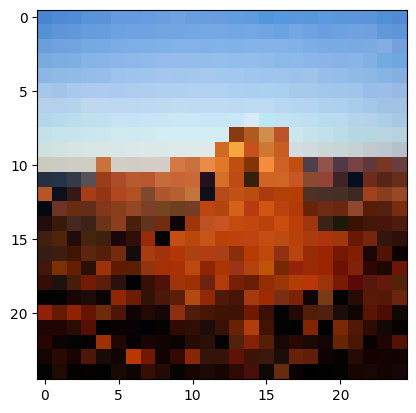

In [107]:
#demostrating this is an array

im_test = cv2.resize(rgb, (25, 25))
plt.imshow(im_test)
im_test.shape

In [108]:
# get the bgr of element in index 0

#b, g, r

im_test[0][0][0], im_test[0][0][1], im_test[0][0][2]


(np.uint8(73), np.uint8(132), np.uint8(208))

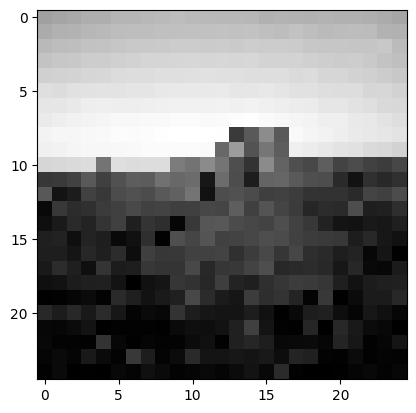

In [109]:
gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [110]:
gray[0][0]

np.uint8(148)

In [111]:
gray[0]

array([148, 153, 156, 161, 161, 168, 168, 170, 172, 175, 172, 171, 170,
       170, 169, 164, 166, 165, 164, 167, 164, 164, 162, 158, 154],
      dtype=uint8)

In [112]:
gray

array([[148, 153, 156, 161, 161, 168, 168, 170, 172, 175, 172, 171, 170,
        170, 169, 164, 166, 165, 164, 167, 164, 164, 162, 158, 154],
       [158, 164, 165, 169, 171, 175, 176, 176, 178, 178, 179, 179, 180,
        179, 180, 177, 175, 180, 176, 172, 174, 175, 174, 165, 164],
       [171, 175, 176, 180, 181, 183, 186, 186, 187, 189, 189, 188, 189,
        187, 190, 189, 189, 188, 184, 183, 183, 182, 182, 185, 173],
       [181, 184, 185, 190, 190, 192, 194, 197, 197, 198, 199, 198, 199,
        198, 199, 196, 195, 196, 192, 191, 189, 190, 186, 181, 177],
       [192, 194, 196, 198, 199, 203, 204, 204, 206, 206, 207, 208, 207,
        207, 205, 205, 205, 202, 203, 198, 198, 194, 192, 189, 185],
       [206, 203, 208, 209, 210, 210, 212, 212, 214, 215, 215, 215, 216,
        213, 213, 214, 212, 208, 208, 205, 204, 204, 198, 199, 194],
       [213, 213, 215, 220, 221, 220, 220, 221, 222, 223, 223, 223, 224,
        222, 224, 222, 220, 218, 217, 213, 213, 209, 206, 201, 200],
       [216, 220, 223, 225, 226, 229, 229, 230, 230, 232, 232, 230, 231,
        233, 235, 231, 228, 226, 225, 221, 221, 215, 214, 211, 205],
       [225, 227, 227, 229, 230, 233, 232, 233, 235, 236, 236, 236, 235,
         55,  83, 130,  83, 230, 226, 224, 220, 216, 214, 213, 211],
       [222, 224, 226, 228, 228, 229, 230, 232, 232, 232, 232, 231,  97,
        145,  78, 110,  87, 221, 218, 214, 211, 208, 202, 200, 194],
       [198, 200, 202, 203, 108, 205, 203, 204, 204, 115, 107, 129, 108,
         73,  48, 129,  92,  74,  68,  88,  63,  71,  61,  57,  67],
       [ 52,  55,  62,  83,  60,  76,  87,  86, 105,  97, 101,  23, 101,
         72,  28,  93,  95,  84,  74,  72,  40,  18,  46,  39,  46],
       [ 82,  19,  27,  61,  54,  71,  77,  71,  84,  91, 108,  18,  72,
         77,  70,  59,  61,  57,  48,  47,  47,  40,  64,  60,  71],
       [ 10,  53,  43,  46,  56,  60,  69,  62,  63,  59,  60,  67,  65,
         88,  60,  79,  64,  56,  36,  43,  40,  72,  29,  32,  44],
       [ 15,  25,  40,  34,  49,  60,  30,  50,  44,   7,  53,  80,  82,
         70,  67,  63,  73,  61,  54,  33,  20,  18,  24,  23,  30],
       [ 30,  33,  15,  34,  29,  10,  17,  45,   3,  74,  65,  79,  62,
         63,  67,  73,  70,  62,  57,  55,  54,  28,  39,  23,  17],
       [ 29,  29,  21,  37,  30,  42,  13,  59,  52,  54,  62,  62,  63,
         46,  57,  68,  51,  66,  44,  40,  29,  34,   8,  21,   2],
       [ 24,  42,  30,  15,  50,  27,  29,  52,  49,  49,  68,  39,  51,
         54,  63,  73,  38,  40,  43,  38,  23,  37,  10,   8,  26],
       [ 15,  18,  27,  30,  31,  19,   1,  17,  21,  51,  47,  37,  58,
         34,  30,  45,  51,  57,  55,  51,  30,  18,  27,  30,  31],
       [  2,   3,   7,  12,   4,  40,  30,  18,  25,  31,  68,  41,  26,
         22,  57,  44,  48,  35,   5,  53,   2,  12,  26,  26,  38],
       [ 39,  27,  38,  24,  41,  23,   5,  11,   8,  48,  28,  22,  20,
         20,  28,  17,   2,  10,  28,  32,  14,   6,  23,  16,   7],
       [  8,   7,  12,  19,   1,   3,   3,   3,   2,  11,  15,  14,  18,
         32,  60,  20,   3,   2,  36,   1,  39,  24,  12,   9,   1],
       [  9,   4,   4,   3,  48,   8,   2,   6,   4,   4,  12,  16,   3,
         32,  36,  29,   9,  10,  11,   7,  35,  23,   3,   7,  21],
       [  6,  11,   6,  24,  11,   4,  54,  28,   5,  12,  40,  20,  20,
         23,  20,  24,  13,  35,  31,   4,   3,  12,   3,   5,   4],
       [  3,  11,   1,   2,   1,   9,   5,  16,  11,   4,   6,  10,   6,
         12,  19,   9,  41,   3,   1,   1,   2,   6,   9,   4,   8]],
      dtype=uint8)

In [113]:
import torch

kernel =  torch.randn(3,3)
kernel = kernel.to(torch.int32)
kernel

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [114]:
bias = torch.tensor([5], dtype=torch.float32)
bias

tensor([5.])

In [115]:
def Output_shape(image, kernel, padding, stride):
  h,w = image.shape[-2], image.shape[-1]
  k_h, k_w = kernel.shape[-2], kernel.shape[-1]

  h_out = (h - k_h - 2*padding) // stride[0] + 1
  w_out = (w - k_w - 2*padding) // stride[0] + 1

  return h_out, w_out

  oshape = Output_shape(gray, kernel, 0, (1,1))
  oshape

In [116]:
gray.shape, kernel.shape

((25, 25), torch.Size([3, 3]))

In [117]:
im_gray = torch.from_numpy(gray)
im_gray = im_gray.to(torch.int32)
im_gray.shape

torch.Size([25, 25])

In [118]:
Output_shape = Output_shape(im_gray, kernel, padding =0, stride=(1,1))
Outputa = np.zeros(Output_shape)

for i in range(Output_shape[0]):
  for j in range(Output_shape[1]):
    tdot = torch.tensordot(im_gray[i:i+3, j:j+3], kernel).numpy()
    Outputa[i,j] = tdot + bias.numpy()
    Outputa

/tmp/ipython-input-1312538519.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Outputa[i,j] = tdot + bias.numpy()


In [119]:
import torch.nn.functional as F
import torch.nn as nn

im_gray = im_gray.reshape(1,1,25,25)
kernel = kernel.reshape(1,1,3,3)

im_gray.shape, kernel.shape


(torch.Size([1, 1, 25, 25]), torch.Size([1, 1, 3, 3]))

In [120]:
#define the filter for convolution operation

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=(1,1), padding=(0,0), bias=False)

#set the filter for convolution operation

kernel = kernel.to(torch.float32)
im_gray = im_gray.to(torch.float32)
print ("kernel_shape = ", kernel.shape)
print ("im_gray_shape = ", im_gray.shape)

conv.weight = nn.Parameter(kernel)
conv.bias = nn.Parameter(bias)

#apply yhe convolution process

outputb = conv(im_gray)

print ("output_shape = ", outputb.shape)
print('output:', outputb)



kernel_shape =  torch.Size([1, 1, 3, 3])
im_gray_shape =  torch.Size([1, 1, 25, 25])
output_shape =  torch.Size([1, 1, 23, 23])
output: tensor([[[[5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 

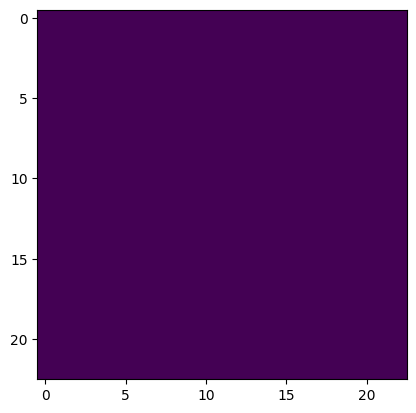

In [121]:
plt.imshow(Outputa)

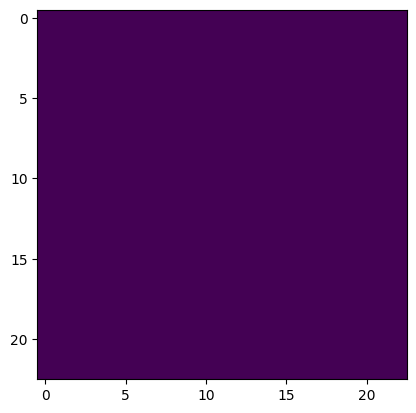

In [122]:
plt.imshow(outputb.detach().numpy().reshape(23,23))

In [123]:
torch.any(outputb == outputb)

tensor(True)

In [124]:
#convolutional neural network implementation

!pip3 install torchviz

In [125]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot

In [126]:
class convents(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=4, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5) # Corrected from linear2
    self.fc1 = nn.Linear(64*7*7, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.dropout1(x)
    x = self.pool(F.relu(self.conv2(x)))
    x = self.dropout2(x)
    x = x.view(-1, 64*7*7)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


net = convents()


#loss and optimizers

criterions = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net

convents(
  (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [129]:
#transfrom the image to pytorch Tensor

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [154]:
img = cv2.resize(im_test, (18, 23))
img = transform(img)
img.shape

torch.Size([3, 23, 18])

In [157]:
conv1 = net.conv1

# img is already a tensor from the previous cell, so we just need to add a batch dimension
img_tensor = img.unsqueeze(0).float()

y = conv1(img_tensor)
print("output shape:", y.shape)

output shape: torch.Size([1, 32, 22, 17])


In [161]:
# Get activation of the network layers
# The input 'y' is already the output of the first convolution (conv1) and has 32 channels.
# Pass 'y' through the subsequent layers of the network defined in the 'convents' class.

# Apply the pooling layer
y = net.pool(F.relu(y))

# Apply the first dropout layer
y = net.dropout1(y)

# Apply the second convolutional layer (conv2)
y = net.pool(F.relu(net.conv2(y)))

# Apply the second dropout layer
y = net.dropout2(y)

# Flatten the output for the fully connected layers
y = y.view(-1, 64 * 7 * 7)

# Apply the first fully connected layer (fc1)
y = F.relu(net.fc1(y))

# Apply the second fully connected layer (fc2)
y = net.fc2(y)

print("output shape:", y.shape)

RuntimeError: Given groups=1, weight of size [64, 32, 3, 3], expected input[1, 64, 1, 1] to have 32 channels, but got 64 channels instead

In [140]:
im_gray.shape

torch.Size([1, 1, 25, 25])

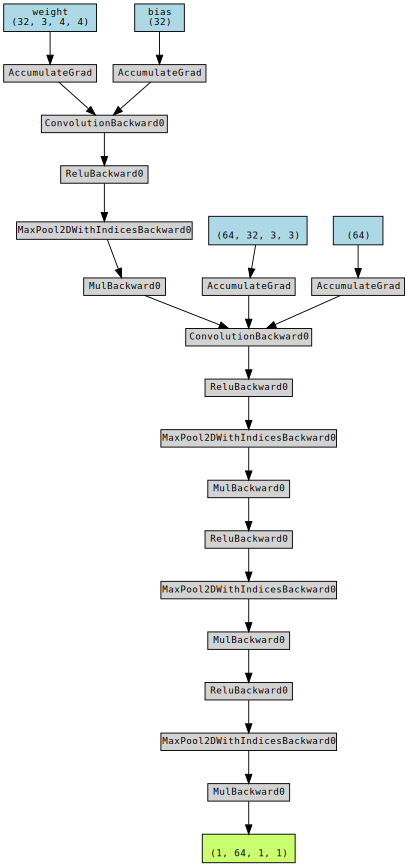

In [162]:
make_dot(y, params=dict(conv1.named_parameters()))

In [163]:
# get weight of first convolutional layers

weight = conv1.weight.detach().numpy()
weight.shape


(32, 3, 4, 4)

TypeError: Invalid shape () for image data

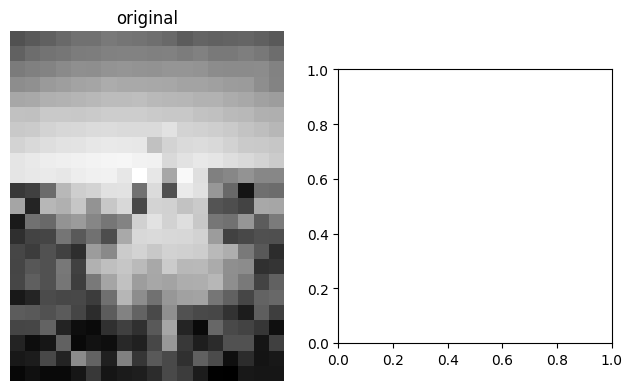

In [168]:
plt.figure(figsize=(12,5))

#plot the original greyscale image
plt.subplot(1, 3, 1)
# Corrected reshaping and indexing for displaying the first channel of the original image
plt.imshow(img.detach().numpy().reshape(3, 23, 18)[0], cmap='gray')
plt.title('original')
plt.axis('off')
# img = Variable(img.unsqueeze(0), requires_grad=True) # This line is not needed here for plotting

#plot the convolved greyscale image
#squeeze tensor to numpy image

# Use the output 'y' from the first convolution (before further processing)
# y from the cell 'zmEz-ByJn4Fm' has shape (1, 32, 22, 17)
img_conv1 = y.detach().numpy()
img_conv1 = np.squeeze(img_conv1) # Shape is now (32, 22, 17)

# Display one of the channels from the convolved output
plt.subplot(1, 3, 2)
plt.imshow(img_conv1[0], cmap='gray') # Displaying the first channel
plt.title('After convolution (first channel)')
plt.axis('off')

#plot the weight of the convolution layer

weights = np.squeeze(weight) # Shape is (32, 3, 4, 4)

# Display the weight of one kernel for one input channel
plt.subplot(1, 3, 3)
plt.imshow(weights[0,0,:,:], cmap='gray') # Corrected variable name and indexing
plt.title('Weight (first kernel, first input channel)')
plt.axis('off')

plt.show()

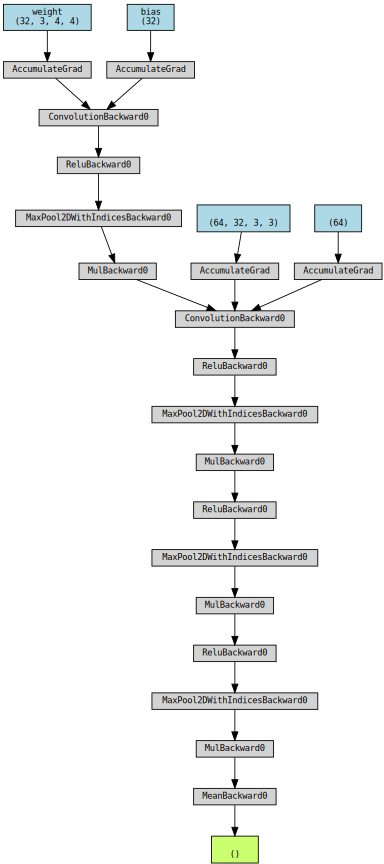

In [169]:
make_dot(y.mean(), params=dict(conv1.named_parameters()))